##  Financial Time Series Analysis for Portfolio Optimization

#### Notebook Overview
##### This notebook provides a comprehensive analysis of three key assets – Tesla (TSLA), Vanguard Total Bond Market ETF (BND), and S&P 500 ETF (SPY) – to enhance portfolio management strategies for GMF Investments.
##### We will:
 1. Fetch historical data for the assets.
 2. Preprocess the data to prepare it for analysis.
 3. Conduct Exploratory Data Analysis (EDA) to uncover insights into trends, volatility, and risk.
 4. Perform advanced analysis, including time series decomposition and risk metrics, to aid in strategic recommendations.

###  Importing Necessary Libraries and Custom Modules

In [17]:
import logging
import pandas as pd
import sys, os
import warnings
warnings.filterwarnings('ignore')

In [18]:
sys.path.append(os.path.abspath('../scripts'))

In [19]:
from data_fetch import fetch_data, save_data_to_csv
from preprocess import clean_data, normalize_data
from eda import plot_closing_price, calculate_daily_returns, plot_volatility, detect_outliers
from analysis import decompose_time_series, calculate_risk_metrics, analyze_volatility

### Set up logging for this session

In [20]:
logging.basicConfig(level=logging.INFO, filename='financial_analysis.log', filemode='w')

## --- Task 1: Data Extraction ---
### Step 1.1: Define Parameters and Fetch Data
##### For our analysis, we will extract historical financial data for three assets – Tesla (TSLA), Vanguard Total Bond Market ETF (BND), and S&P 500 ETF (SPY).
The data will be fetched from YFinance, covering January 1, 2015, to October 31, 2024, to provide a broad timeframe for assessing trends and patterns.

In [21]:
# Parameters
tickers = ['TSLA', 'BND', 'SPY']
start_date = '2015-01-01'
end_date = '2024-10-31'
data = {}

In [22]:
for ticker in tickers:
    logging.info(f"Fetching data for {ticker}")
    data[ticker] = fetch_data(ticker, start_date, end_date)
    save_data_to_csv(data[ticker], f'{ticker}_data.csv')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


### Data Extraction
**Objective:** Extract historical financial data for Tesla (TSLA), Vanguard Total Bond Market ETF (BND), and S&P 500 ETF (SPY).
**Process:** Using YFinance, we fetched daily trading data, including Open, High, Low, Close, and Volume values. The data is saved locally for reproducibility and reference.


### --- Task 2: Data Preprocessing and Overview ---
##### Step 2.1: Clean and Overview Data
After extracting the data, we clean it to handle missing values and normalize it to prepare for analysis and modeling.
**Descriptive Statistics:** For each asset, we calculate summary statistics like mean, median, and standard deviation for price and volume, providing insights into their overall distributions.
**Expected Insights:** This helps gauge the typical price range, average trading volume, and volatility level of each asset.

In [23]:
for ticker in data:
    print(f"\n--- {ticker} DataFrame Info ---")
    display(data[ticker].info())
    print(f"\n--- {ticker} DataFrame Head ---")
    display(data[ticker].head())


--- TSLA DataFrame Info ---
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2474 entries, 2015-01-02 00:00:00+00:00 to 2024-10-30 00:00:00+00:00
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, TSLA)  2474 non-null   float64
 1   (Close, TSLA)      2474 non-null   float64
 2   (High, TSLA)       2474 non-null   float64
 3   (Low, TSLA)        2474 non-null   float64
 4   (Open, TSLA)       2474 non-null   float64
 5   (Volume, TSLA)     2474 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 135.3 KB


None


--- TSLA DataFrame Head ---


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,,
2015-01-02 00:00:00+00:00,14.620667,14.620667,14.883333,14.217333,14.858000,71466000
2015-01-05 00:00:00+00:00,14.006000,14.006000,14.433333,13.810667,14.303333,80527500
2015-01-06 00:00:00+00:00,14.085333,14.085333,14.280000,13.614000,14.004000,93928500
2015-01-07 00:00:00+00:00,14.063333,14.063333,14.318667,13.985333,14.223333,44526000
2015-01-08 00:00:00+00:00,14.041333,14.041333,14.253333,14.000667,14.187333,51637500



--- BND DataFrame Info ---
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2474 entries, 2015-01-02 00:00:00+00:00 to 2024-10-30 00:00:00+00:00
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   (Adj Close, BND)  2474 non-null   float64
 1   (Close, BND)      2474 non-null   float64
 2   (High, BND)       2474 non-null   float64
 3   (Low, BND)        2474 non-null   float64
 4   (Open, BND)       2474 non-null   float64
 5   (Volume, BND)     2474 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 135.3 KB


None


--- BND DataFrame Head ---


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,BND,BND,BND,BND,BND,BND
Date,,,,,,
2015-01-02 00:00:00+00:00,63.358753,82.650002,82.690002,82.419998,82.430000,2218800
2015-01-05 00:00:00+00:00,63.542698,82.889999,82.919998,82.699997,82.739998,5820100
2015-01-06 00:00:00+00:00,63.726696,83.129997,83.379997,83.029999,83.029999,3887600
2015-01-07 00:00:00+00:00,63.765091,83.180000,83.279999,83.050003,83.139999,2433400
2015-01-08 00:00:00+00:00,63.665421,83.050003,83.110001,82.970001,83.110001,1873400



--- SPY DataFrame Info ---
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2474 entries, 2015-01-02 00:00:00+00:00 to 2024-10-30 00:00:00+00:00
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   (Adj Close, SPY)  2474 non-null   float64
 1   (Close, SPY)      2474 non-null   float64
 2   (High, SPY)       2474 non-null   float64
 3   (Low, SPY)        2474 non-null   float64
 4   (Open, SPY)       2474 non-null   float64
 5   (Volume, SPY)     2474 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 135.3 KB


None


--- SPY DataFrame Head ---


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,SPY,SPY,SPY,SPY,SPY,SPY
Date,,,,,,
2015-01-02 00:00:00+00:00,173.173752,205.429993,206.880005,204.179993,206.380005,121465900
2015-01-05 00:00:00+00:00,170.046249,201.720001,204.369995,201.350006,204.169998,169632600
2015-01-06 00:00:00+00:00,168.444641,199.820007,202.720001,198.860001,202.089996,209151400
2015-01-07 00:00:00+00:00,170.543716,202.309998,202.720001,200.880005,201.419998,125346700
2015-01-08 00:00:00+00:00,173.569977,205.899994,206.160004,203.990005,204.009995,147217800


In [24]:
for ticker, df in data.items():
    print(f"\n--- {ticker} Descriptive Statistics ---")
    display(df.describe())


--- TSLA Descriptive Statistics ---


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA
count,2474.000000,2474.000000,2474.000000,2474.000000,2474.000000,2.474000e+03
mean,111.438965,111.438965,113.895836,108.869421,111.461872,1.125745e+08
std,110.120450,110.120450,112.643277,107.541830,110.208156,7.449619e+07
min,9.578000,9.578000,10.331333,9.403333,9.488000,1.062000e+07
25%,17.066167,17.066167,17.368167,16.790167,17.058499,6.682590e+07
50%,25.043000,25.043000,25.279000,24.462334,24.986667,9.289395e+07
75%,216.865002,216.865002,221.910004,212.084999,217.264999,1.301899e+08
max,409.970001,409.970001,414.496674,405.666656,411.470001,9.140820e+08



--- BND Descriptive Statistics ---


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,BND,BND,BND,BND,BND,BND
count,2474.000000,2474.000000,2474.000000,2474.000000,2474.000000,2.474000e+03
mean,70.089252,80.316039,80.431152,80.198464,80.319968,4.169014e+06
std,4.889919,5.097592,5.082268,5.113232,5.100419,2.778389e+06
min,62.637562,68.040001,68.379997,67.989998,68.080002,0.000000e+00
25%,66.314066,76.379997,76.674999,76.265001,76.502501,2.024900e+06
50%,68.888958,81.410004,81.519997,81.300003,81.410004,3.710900e+06
75%,73.807495,84.010002,84.167500,83.937502,84.047503,5.519825e+06
max,79.812950,89.480003,89.589996,89.440002,89.550003,3.193720e+07



--- SPY Descriptive Statistics ---


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,SPY,SPY,SPY,SPY,SPY,SPY
count,2474.000000,2474.000000,2474.000000,2474.000000,2474.000000,2.474000e+03
mean,310.253154,330.623634,332.368856,328.614426,330.570376,8.810268e+07
std,111.250656,103.324179,103.840765,102.719137,103.311248,4.491678e+07
min,157.328552,182.860001,184.100006,181.020004,182.339996,2.027000e+07
25%,214.822334,242.130001,243.380005,240.692501,242.302498,5.960170e+07
50%,275.812302,298.089996,299.324997,296.804993,298.095001,7.696935e+07
75%,402.297516,416.212502,418.242500,413.687500,416.240005,1.027178e+08
max,584.590027,584.590027,586.119995,582.580017,585.909973,5.072443e+08


### --- Task 3: Exploratory Data Analysis (EDA) ---
##### Step 3.1: Visualize Closing Prices
Visualizing the historical closing prices of each asset helps identify major trends and price shifts over time.
We also calculate daily returns to analyze price volatility, a key factor in portfolio risk assessment.

**Objective:** Explore trends, volatility, and anomalies in each asset's price data to assess risk and return potential.
- **Closing Price Trends:** Plotted over time, these show each asset's overall market performance, revealing growth or decline patterns.
- **Daily Returns:** Calculated as the percentage change in closing prices, these provide insights into asset volatility.
- **Outlier Detection:** Identifies significant price shifts, which could be due to market events, earnings announcements, or economic factors

In [25]:
for ticker in data:
    logging.info(f"Cleaning and normalizing data for {ticker}")
    data[ticker] = clean_data(data[ticker])
    # data[ticker] = normalize_data(data[ticker])

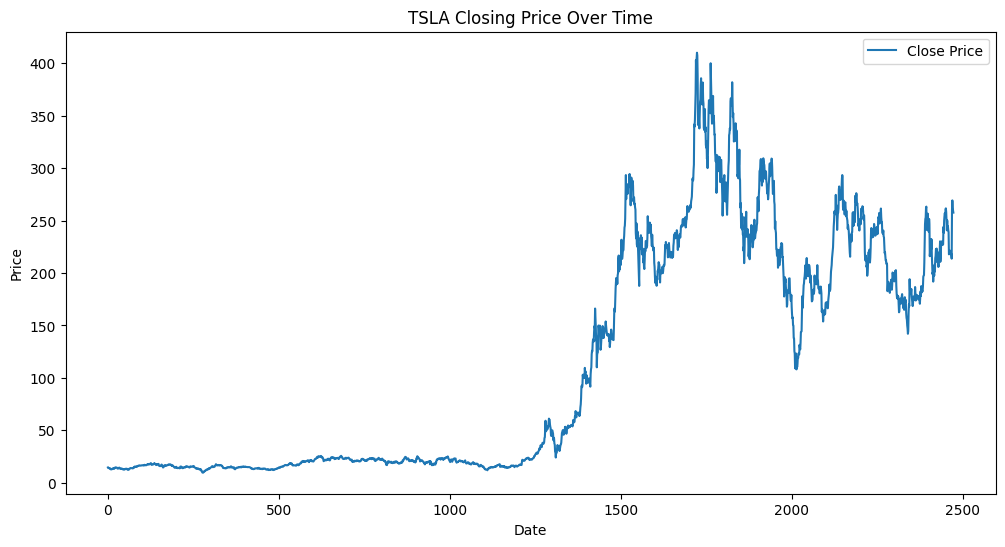

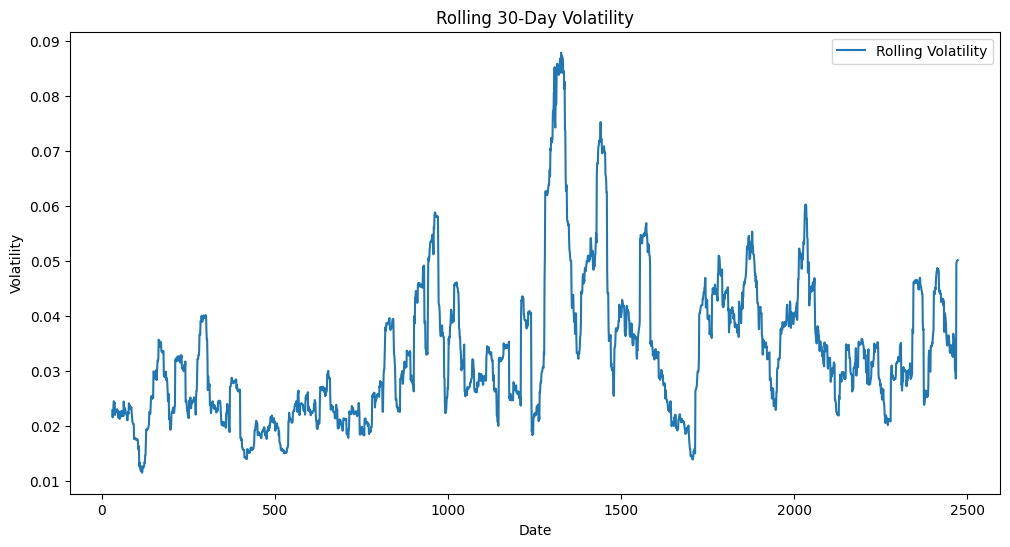

Price,Adj Close,Close,High,Low,Open,Volume,Daily_Return
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA,
8,12.846000,12.846000,13.013333,12.333333,12.388667,173278500,-0.056597
63,13.540000,13.540000,13.850000,13.166667,13.200000,186837000,0.063351
78,15.436667,15.436667,15.916667,14.800000,14.837333,175089000,0.060065
137,17.784666,17.784666,18.233334,17.770000,18.003332,91630500,-0.054879
149,16.408667,16.408667,17.000000,15.741333,16.636000,219357000,-0.088846
...,...,...,...,...,...,...,...
2425,210.660004,210.660004,224.800003,210.320007,223.820007,79514500,-0.056479
2435,210.729996,210.729996,233.600006,210.509995,232.600006,112177000,-0.084459
2444,243.919998,243.919998,244.240005,232.130005,234.000000,102694600,0.073592


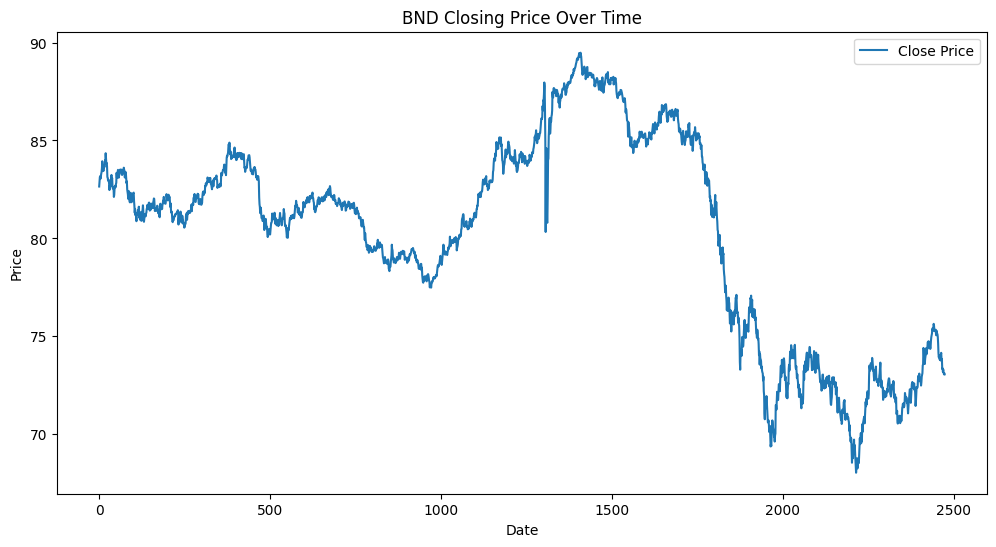

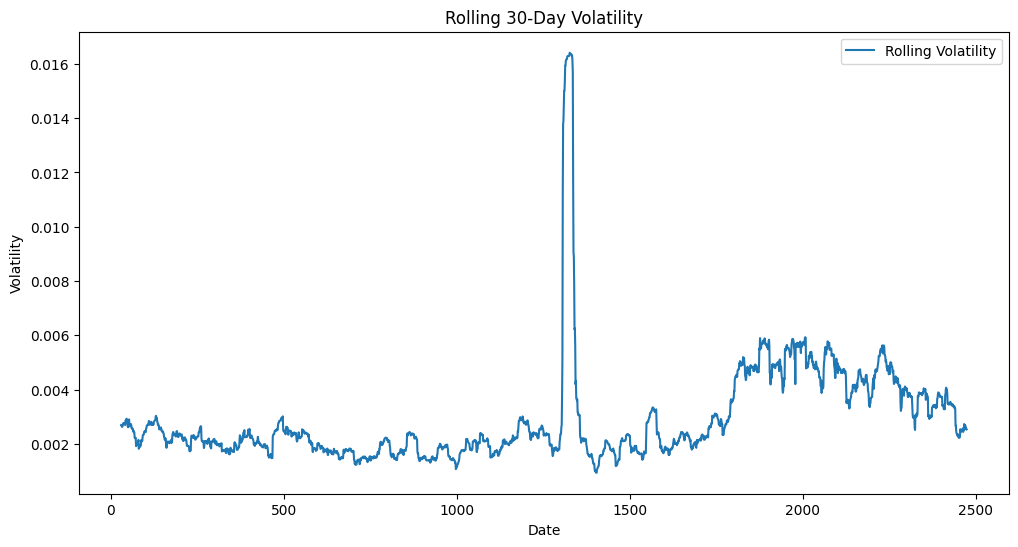

Price,Adj Close,Close,High,Low,Open,Volume,Daily_Return
Ticker,BND,BND,BND,BND,BND,BND,
1306,70.95575,80.330002,84.889999,76.489998,83.480003,16986900,-0.054385


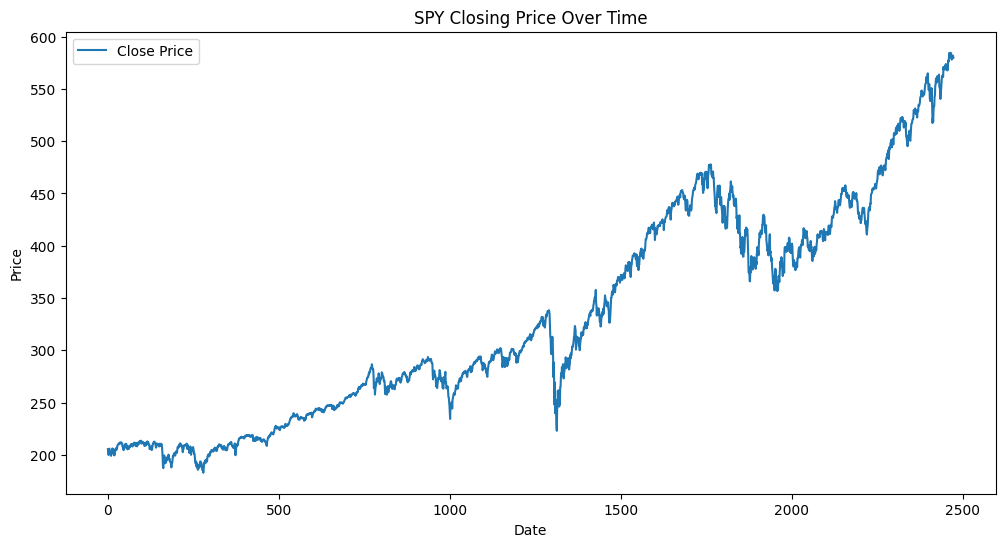

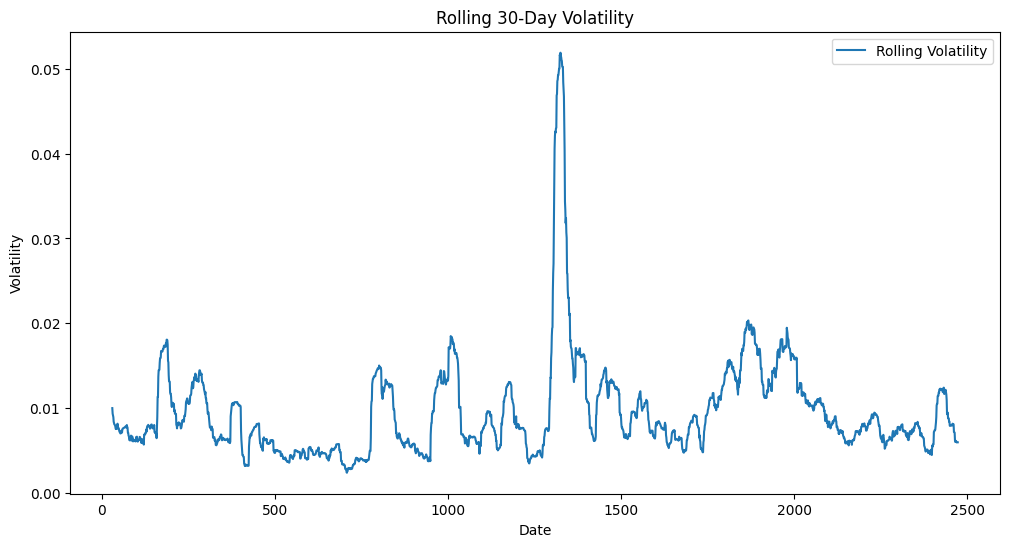

Price,Adj Close,Close,High,Low,Open,Volume,Daily_Return
Ticker,SPY,SPY,SPY,SPY,SPY,SPY,
1002,224.751801,246.179993,246.179993,233.759995,235.970001,218485400,0.050525
1303,255.101013,274.230011,284.190002,273.450012,275.299988,309417300,-0.078094
1304,268.301208,288.420013,288.519989,273.500000,284.640015,276444100,0.051745
1306,230.803040,248.110001,266.660004,247.679993,256.000000,392220700,-0.095677
1307,250.533569,269.320007,271.480011,248.520004,263.089996,329566100,0.085486
1308,223.119217,239.850006,256.899994,237.360001,241.179993,297240000,-0.109424
1309,235.165878,252.800003,256.170013,237.070007,245.039993,262070500,0.053992
1310,223.258774,240.000000,248.369995,228.020004,236.250000,327597100,-0.050633
1314,227.519089,243.149994,244.100006,233.800003,234.419998,235494500,0.090603


In [26]:
for ticker, df in data.items():
    # Plot closing prices over time
    plot_closing_price(df, ticker)
    
    # Calculate daily returns and plot volatility
    df = calculate_daily_returns(df)
    plot_volatility(df)
    
    # Detect outliers in returns
    outliers = detect_outliers(df)
    display(outliers)

### --- Task 4: Advanced Analysis ---
##### Step 4.1: Time Series Decomposition
 By decomposing the time series, we can break down each asset's price movement into trend, seasonality, and residual components.
 This helps in understanding whether observed patterns are consistent (trend), cyclical (seasonal), or random (residual).
**Objective:** Decompose each asset's time series into trend, seasonal, and residual components for a detailed breakdown of price movements.
 
 - **Trend:** The underlying direction of the price series over time.
 - **Seasonality:** Recurring patterns that may correspond to market cycles or economic conditions.
 - **Residual:** Random noise that may affect asset prices but does not follow a clear pattern.


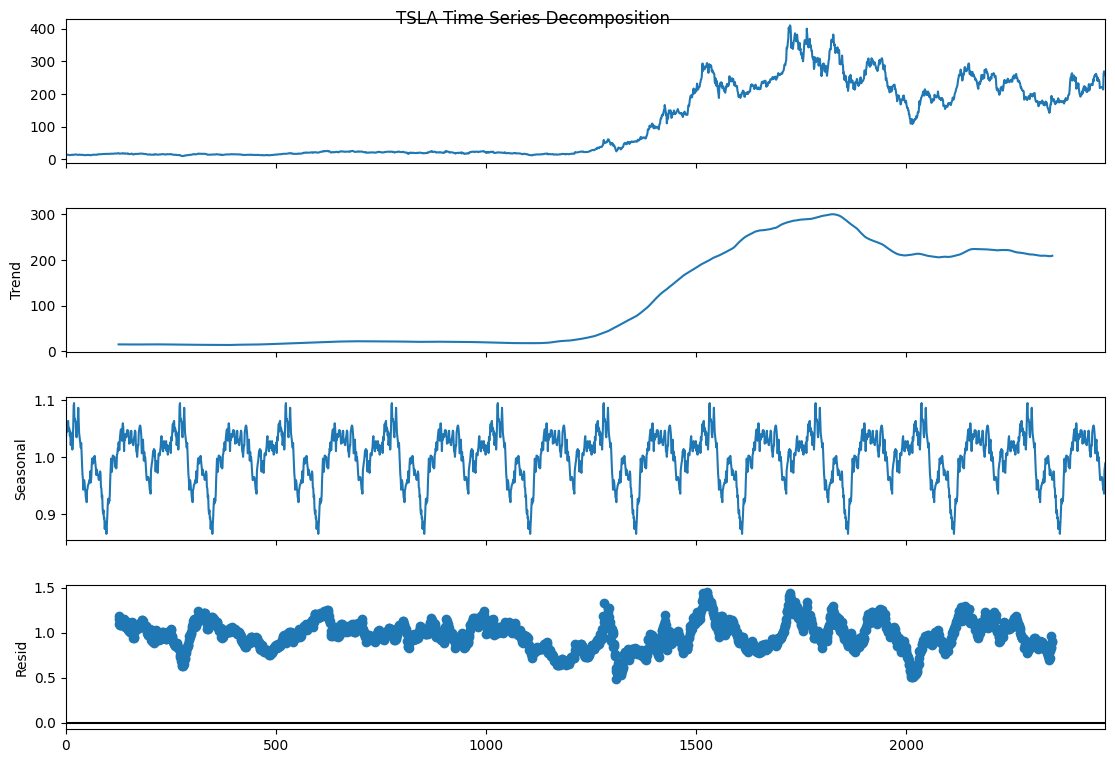

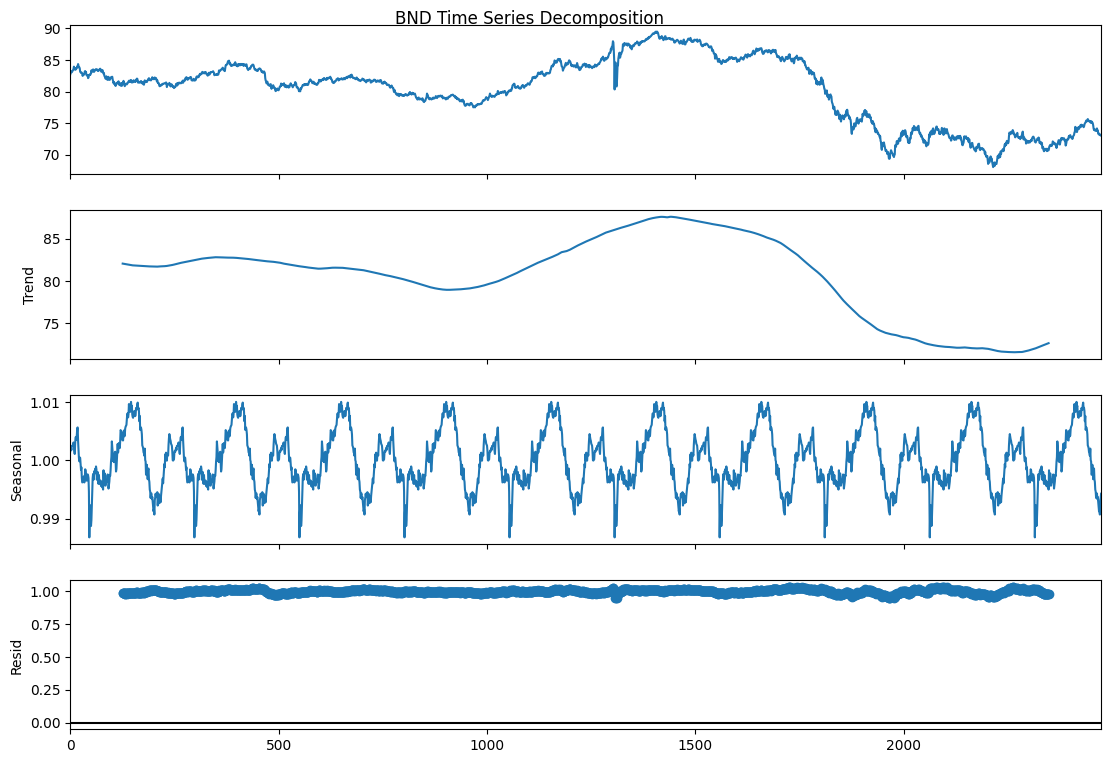

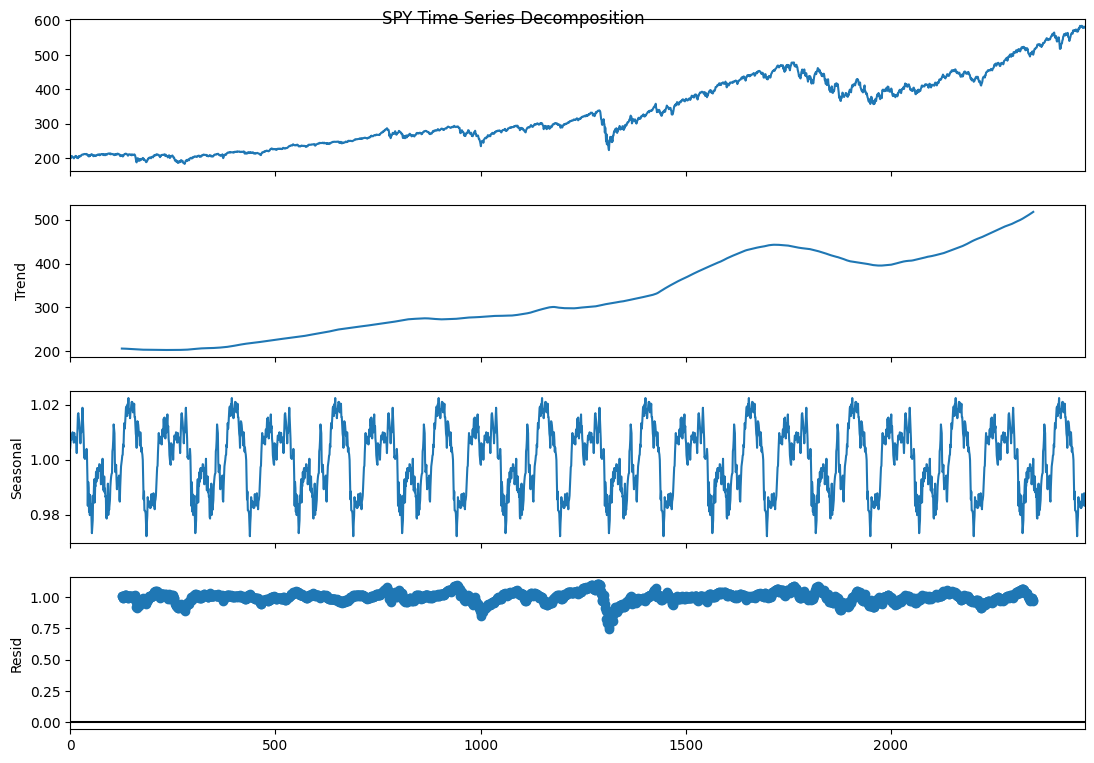

In [27]:
for ticker, df in data.items():
    # Perform time series decomposition
    decomposition = decompose_time_series(df)
    fig = decomposition.plot()
    fig.set_size_inches(12, 8)
    fig.suptitle(f'{ticker} Time Series Decomposition')

### Step 4.2: Calculate Risk Metrics (VaR and Sharpe Ratio)
##### Risk metrics like Value at Risk (VaR) and Sharpe Ratio provide insights into each asset's risk profile.
 - **VaR (99%):** The maximum expected loss with a 99% confidence level.
 - **Sharpe Ratio:** The return-to-risk ratio, indicating the potential reward per unit of risk.
**Objective:** Calculate Value at Risk (VaR) and Sharpe Ratio to understand each asset's risk and reward potential. 
 - **Value at Risk (VaR):** Represents the worst expected loss over a given time frame, with a specified confidence level (99% here).
 - **Sharpe Ratio:** Measures the risk-adjusted return, helping compare assets with different risk levels.

In [28]:
for ticker, df in data.items():
    var_99, sharpe_ratio = calculate_risk_metrics(df)
    print(f"{ticker} - VaR (99%): {var_99:.2f}, Sharpe Ratio: {sharpe_ratio:.2f}")

TSLA - VaR (99%): nan, Sharpe Ratio: 0.80
BND - VaR (99%): nan, Sharpe Ratio: -0.20
SPY - VaR (99%): nan, Sharpe Ratio: 0.69


### Step 4.3: Volatility Analysis
##### Rolling volatility analysis provides insights into short-term fluctuations in asset prices, helping assess recent stability or risk trends.
We calculate a 30-day rolling standard deviation of daily returns to quantify these short-term variations.

 **Objective:** Examine short-term fluctuations in each asset's price movements to understand recent risk trends.
 **Rolling Volatility:** Calculated over a 30-day window, this provides a moving standard deviation of daily returns, showing periods of high or low volatility.